## import Libraries

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

## Data Cleansing

In [36]:
data=pd.read_csv("Automobile_data.csv", na_values='?')

In [37]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [38]:
df=data.copy()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## Dealing with nulls

In [40]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [41]:
avg=df.mean().round(4)

C:\Users\dell\AppData\Local\Temp\ipykernel_26132\2126847538.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg=df.mean().round(4)


In [47]:
df=df.fillna(avg)

In [48]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [49]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [46]:
df['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [23]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [26]:
df['num-of-doors']= df['num-of-doors'].fillna('four')

In [27]:
df['num-of-doors']= df['num-of-doors'].replace({"two":2,"four":4})

In [28]:
df['num-of-doors'].unique()

array([2, 4], dtype=int64)

In [50]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [51]:
df['num-of-cylinders']= df['num-of-cylinders'].replace({'four':4, 'six':6, 'five':5,'three':3, 'twelve':12, 'two':2,'eight':8})

In [52]:
df['num-of-cylinders'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

### Data Correletion 

In [53]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.130077,-0.008692,-0.178515,0.071389,0.273679,-0.035823,0.034606,-0.082201
normalized-losses,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.108081,0.110997,-0.029263,0.054928,-0.114525,0.203434,0.237748,-0.218749,-0.178221,0.133999
wheel-base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488758,0.160945,0.249786,0.351957,-0.360704,-0.470414,-0.544082,0.583168
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606460,0.129522,0.158414,0.554434,-0.287031,-0.670909,-0.704662,0.682986
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559151,0.182939,0.181129,0.642195,-0.219859,-0.642704,-0.677218,0.728699
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171095,-0.055349,0.261214,-0.110137,-0.320602,-0.048640,-0.107358,0.134388
curb-weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648484,0.168783,0.151362,0.750968,-0.266283,-0.757414,-0.797465,0.820825
num-of-cylinders,-0.113129,0.108081,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231431,0.008154,-0.020002,0.691208,-0.124358,-0.445837,-0.466666,0.687770
engine-size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583793,0.203096,0.028971,0.810713,-0.244599,-0.653658,-0.677470,0.861752
bore,-0.130077,-0.029263,0.488758,0.606460,0.559151,0.171095,0.648484,0.231431,0.583793,1.000000,-0.055909,0.005200,0.575738,-0.254755,-0.584513,-0.586995,0.532300


<AxesSubplot:>

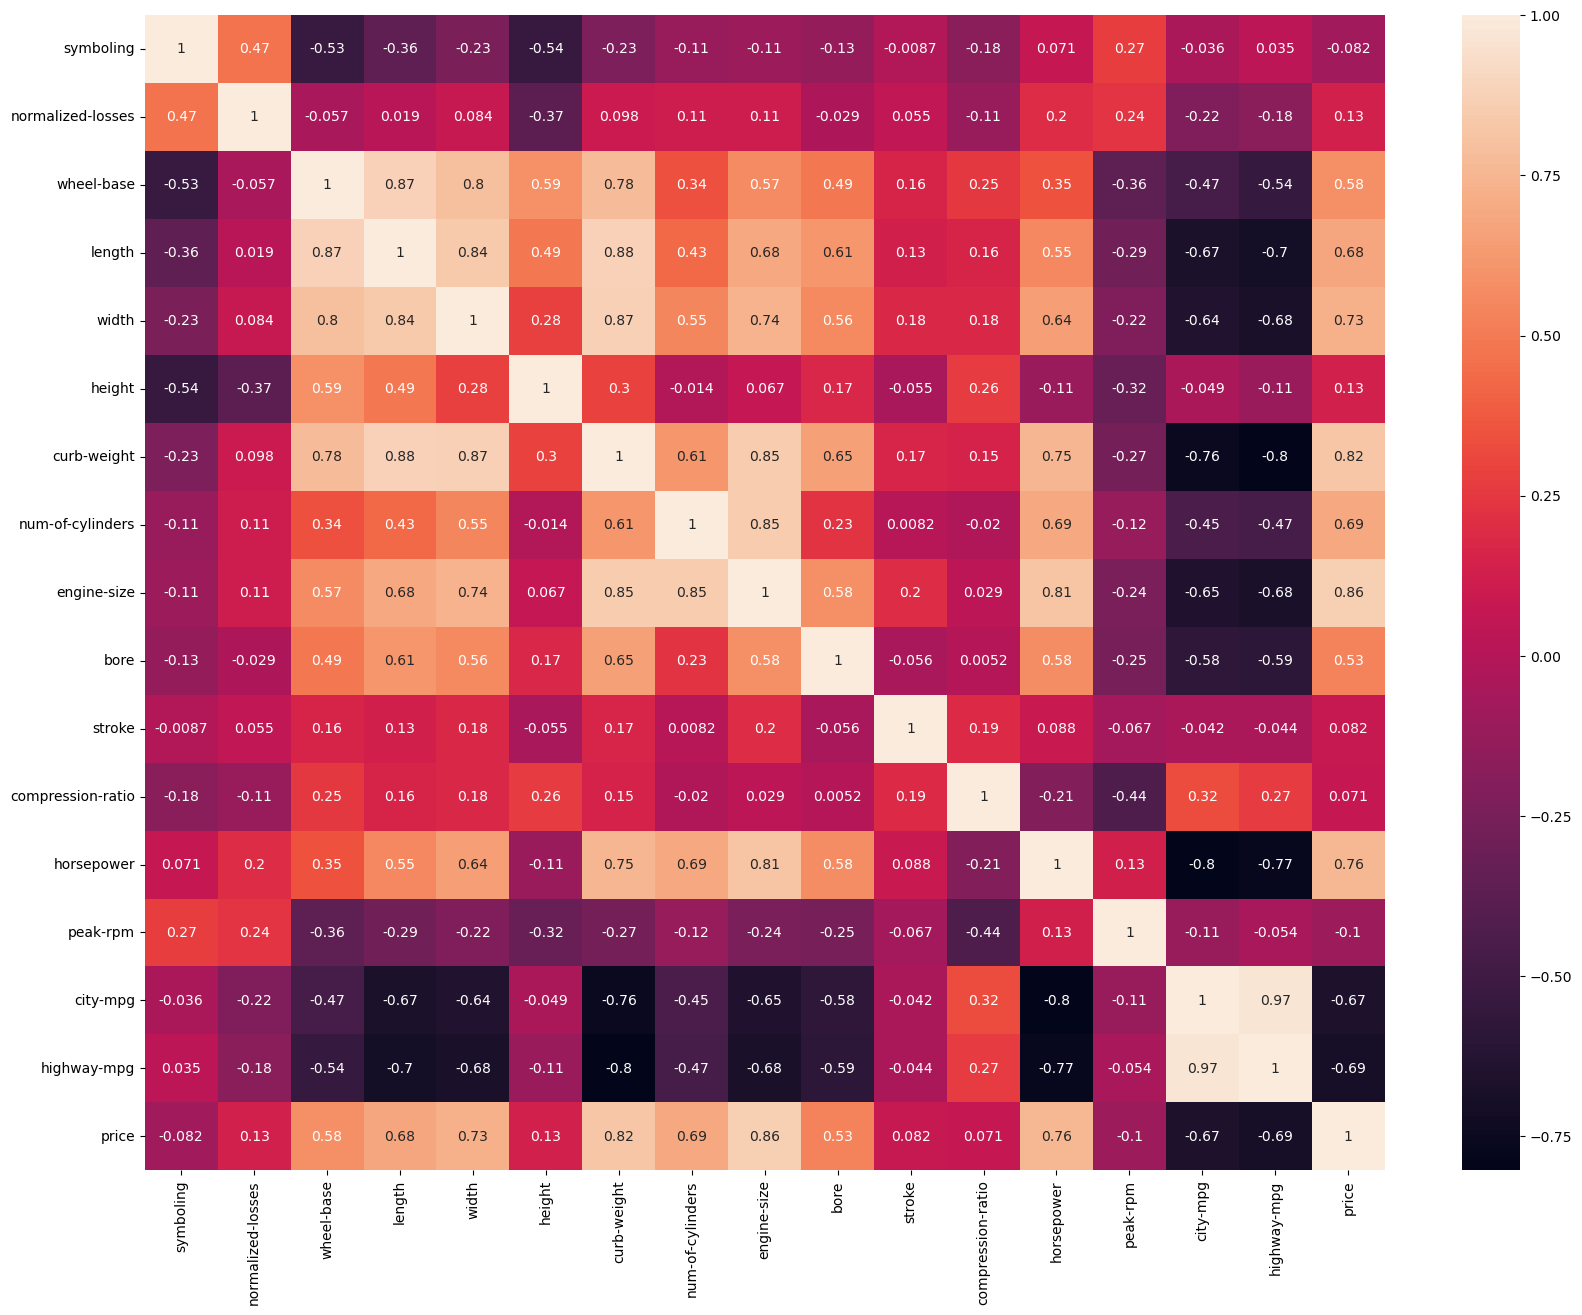

In [56]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

### Feature Reduction

In [57]:
data_reduc=df.drop(columns=['width','length','wheel-base','engine-size','highway-mpg','horsepower','city-mpg'])

In [58]:
data_reduc

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,height,curb-weight,engine-type,num-of-cylinders,fuel-system,bore,stroke,compression-ratio,peak-rpm,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,48.8,2548,dohc,4,mpfi,3.47,2.68,9.0,5000.0,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,48.8,2548,dohc,4,mpfi,3.47,2.68,9.0,5000.0,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,52.4,2823,ohcv,6,mpfi,2.68,3.47,9.0,5000.0,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,54.3,2337,ohc,4,mpfi,3.19,3.40,10.0,5500.0,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,54.3,2824,ohc,5,mpfi,3.19,3.40,8.0,5500.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,55.5,2952,ohc,4,mpfi,3.78,3.15,9.5,5400.0,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,55.5,3049,ohc,4,mpfi,3.78,3.15,8.7,5300.0,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,55.5,3012,ohcv,6,mpfi,3.58,2.87,8.8,5500.0,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,55.5,3217,ohc,6,idi,3.01,3.40,23.0,4800.0,22470.0


### Categorical Features transformation

In [65]:
DFrame = pd.get_dummies(data_reduc, drop_first=True)
DFrame

,symboling,normalized-losses,height,curb-weight,num-of-cylinders,bore,stroke,compression-ratio,peak-rpm,price,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,48.8,2548,4,3.47,2.68,9.0,5000.0,13495.0,...,0,0,0,0,0,0,0,1,0,0
1,3,122.0,48.8,2548,4,3.47,2.68,9.0,5000.0,16500.0,...,0,0,0,0,0,0,0,1,0,0
2,1,122.0,52.4,2823,6,2.68,3.47,9.0,5000.0,16500.0,...,0,1,0,0,0,0,0,1,0,0
3,2,164.0,54.3,2337,4,3.19,3.40,10.0,5500.0,13950.0,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,54.3,2824,5,3.19,3.40,8.0,5500.0,17450.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,55.5,2952,4,3.78,3.15,9.5,5400.0,16845.0,...,0,0,0,0,0,0,0,1,0,0
201,-1,95.0,55.5,3049,4,3.78,3.15,8.7,5300.0,19045.0,...,0,0,0,0,0,0,0,1,0,0
202,-1,95.0,55.5,3012,6,3.58,2.87,8.8,5500.0,21485.0,...,0,1,0,0,0,0,0,1,0,0
203,-1,95.0,55.5,3217,6,3.01,3.40,23.0,4800.0,22470.0,...,0,0,0,0,0,1,0,0,0,0


### Divide Data

#### Divid Data into Feat & labels

In [66]:
x=DFrame.drop('price' , axis=1)
y=pd.DataFrame(DFrame['price'])

In [67]:
x

,symboling,normalized-losses,height,curb-weight,num-of-cylinders,bore,stroke,compression-ratio,peak-rpm,make_audi,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,48.8,2548,4,3.47,2.68,9.0,5000.0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,122.0,48.8,2548,4,3.47,2.68,9.0,5000.0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,122.0,52.4,2823,6,2.68,3.47,9.0,5000.0,0,...,0,1,0,0,0,0,0,1,0,0
3,2,164.0,54.3,2337,4,3.19,3.40,10.0,5500.0,1,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,54.3,2824,5,3.19,3.40,8.0,5500.0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,55.5,2952,4,3.78,3.15,9.5,5400.0,0,...,0,0,0,0,0,0,0,1,0,0
201,-1,95.0,55.5,3049,4,3.78,3.15,8.7,5300.0,0,...,0,0,0,0,0,0,0,1,0,0
202,-1,95.0,55.5,3012,6,3.58,2.87,8.8,5500.0,0,...,0,1,0,0,0,0,0,1,0,0
203,-1,95.0,55.5,3217,6,3.01,3.40,23.0,4800.0,0,...,0,0,0,0,0,1,0,0,0,0


In [68]:
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


#### Divid Data into Train & Test

In [76]:
x_train,x_test ,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
x_test.head()

,symboling,normalized-losses,height,curb-weight,num-of-cylinders,bore,stroke,compression-ratio,peak-rpm,make_audi,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
78,2,161.0,50.8,2004,4,2.97,3.23,9.4,5500.0,0,...,0,0,0,1,0,0,0,0,0,0
97,1,103.0,53.5,2037,4,3.15,3.29,9.4,5200.0,0,...,0,0,0,1,0,0,0,0,0,0
151,1,87.0,54.5,2040,4,3.05,3.03,9.0,4800.0,0,...,0,0,0,1,0,0,0,0,0,0
44,1,122.0,52.0,1874,4,3.03,3.11,9.6,5400.0,0,...,0,0,0,1,0,0,0,0,0,0
40,0,85.0,54.1,2372,4,3.15,3.58,9.0,5800.0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
y_test.head()

,price
78,6669.0000
97,7999.0000
151,6338.0000
44,13207.1294
40,10295.0000


### Numerical Feature Scaling

In [84]:
scaler_x = MinMaxScaler().fit(x_train)
scaler_y = MinMaxScaler().fit(y_train)

In [85]:
x_train_sc = scaler_x.transform(x_train)
x_test_sc = scaler_x.transform(x_test)

In [86]:
y_train_sc = scaler_y.transform(y_train)
y_test_sc = scaler_y.transform(y_test)

In [88]:
x_train_sc

array([[0.6       , 1.        , 0.15833333, ..., 1.        , 0.        ,
        0.        ],
       [0.6       , 0.37951807, 0.55833333, ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.14457831, 0.43333333, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.46385542, 0.25      , ..., 1.        , 0.        ,
        0.        ],
       [0.8       , 0.10843373, 0.65833333, ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.24698795, 0.45833333, ..., 0.        , 0.        ,
        0.        ]])

In [89]:
y_train_sc

array([[0.32841686],
       [0.04735729],
       [0.12443726],
       [0.07461758],
       [0.06476806],
       [0.88956597],
       [0.02238528],
       [0.3222236 ],
       [0.20654147],
       [0.57159557],
       [0.1667703 ],
       [0.48178087],
       [0.10105708],
       [0.09078473],
       [0.02735978],
       [0.15055341],
       [0.09078473],
       [0.21552046],
       [0.0756871 ],
       [0.16540231],
       [0.14184803],
       [0.18826017],
       [0.26252954],
       [0.06723044],
       [0.03730879],
       [0.0523318 ],
       [0.1185176 ],
       [0.36075115],
       [0.16552668],
       [0.12809352],
       [0.78808606],
       [0.25009327],
       [0.0038055 ],
       [0.34212163],
       [0.7550056 ],
       [0.10205198],
       [0.32704887],
       [0.29548564],
       [0.05471956],
       [0.05357543],
       [0.06004228],
       [0.00756125],
       [0.15804004],
       [0.09267504],
       [0.39236413],
       [0.71714961],
       [0.22892675],
       [0.268

### Apply Linear Regression

In [91]:
lr_model = LinearRegression()
lr_model.fit(x_train_sc,y_train_sc)
y_pred_sc = lr_model.predict(x_test_sc)

### Evaluating the model

In [93]:
mae =mean_absolute_error(y_test_sc,y_pred_sc)
rmse = np.sqrt(mean_squared_error(y_test_sc,y_pred_sc))

print("MAE= ",mae.round(4))
print('RMSE= ',rmse.round(4))

MAE=  0.0473
RMSE=  0.0783


### Inverse Transformation of scaling

In [95]:
y_test_inv = scaler_y.inverse_transform(y_test_sc.reshape(-1,1))
y_pred_inv = scaler_y.inverse_transform(y_pred_sc.reshape(-1,1))

actual_mae = mean_absolute_error(y_test_inv,y_pred_inv)
actual_rmse = np.sqrt(mean_squared_error(y_test_inv,y_pred_inv))

print("Actual MAE= ",actual_mae.round(4))
print('Actual RMSE= ',actual_rmse.round(4))

Actual MAE=  1900.1545
Actual RMSE=  3149.6739
